# <center><span style="font-size: 42px; color: darkgreen;">Construindo Modelos de Regressão - Ridge e LASSO</span></center>

<br><br>

---

<br>

# Contexto

Neste projeto, abordaremos a construção de modelos de regressão linear regularizados utilizando as técnicas **Ridge** e **LASSO**. Essas abordagens são fundamentais para melhorar a performance de modelos ao lidar com datasets que possuem multicolinearidade ou um grande número de variáveis independentes. O objetivo principal é selecionar e ajustar o modelo com melhor desempenho para prever com precisão a variável alvo.

<br><br>

---

<br><br>

# Fluxograma do Processo

<br>

## 1. Importação de Bibliotecas  
**Objetivo:** Importar bibliotecas necessárias para manipulação de dados, visualização, cálculos estatísticos e modelagem.  
**Resultado:** Ambiente configurado.

<br>

## 2. Carregamento dos Dados  
**Objetivo:** Carregar os datasets de treino e teste.  
**Resultado:** Dados de treino e teste prontos para análise.

#### 2.1 Exploração Inicial dos Dados
**Objetivo:** Explorar os datasets de treino e teste.  
**Resultado:** Verificar como os dados estão organizados.

<br>

## 3. Verificação da Skewness na Variável Alvo (**SalePrice**)  
**Objetivo:** Identificar a assimetria da variável alvo para decidir sobre transformações.  
**Método:**  
- Visualização da distribuição com histogramas.  
- Cálculo do valor de skewness.  
**Decisão:** Aplicar transformação logarítmica se a skewness for alta (> 0.75).

<br>

## 4. Transformação Logarítmica na Variável Alvo  
**Objetivo:** Reduzir a skewness para melhorar a normalidade da variável alvo.  
**Resultado:** Variável alvo (**SalePrice**) transformada logaritmicamente.

<br>

## 5. Concatenando Recursos (Variáveis Independentes)  
**Objetivo:** Garantir consistência na aplicação de transformações nos conjuntos de treino e teste.  
**Resultado:** Dataset unificado para transformação.

<br>

## 6. Lidando com Valores NA
**Objetivo**: Substituir valores ausentes com a média de suas respectivas colunas.
**Resultado**: Dataset sem valores ausentes. 

<br>


## 7. Identificação e Correção de Skewness nos Recursos  
**Objetivo:** Corrigir skewness em variáveis numéricas que podem impactar negativamente o modelo.  
**Método:**  
- Identificar variáveis numéricas.  
- Calcular skewness.  
- Aplicar transformação logarítmica em variáveis com skewness > 0.75.  
**Resultado:** Recursos normalizados.

<br>

## 8. Tratamento de Variáveis Categóricas  
**Objetivo:** Converter variáveis categóricas em representações numéricas (dummies).  
**Método:**  
- Usar `pd.get_dummies` para codificação.  
- Preencher valores ausentes com a média.  
**Resultado:** Dataset preparado para modelagem.

<br>

## 9. Separação dos Conjuntos de Treino e Teste  
**Objetivo:** Dividir novamente os dados após transformações.  
**Resultado:** Dados prontos para treinamento e teste.

<br>

## 10. Criação de Função de Avaliação (RMSE)  
**Objetivo:** Avaliar a performance dos modelos usando validação cruzada.  
**Resultado:** Função para cálculo de **RMSE** disponível.

<br>

## 11. Treinamento e Avaliação dos Modelos

<br>

#### 11.1 <u>Modelo de Regressão Linear</u> 
**Objetivo:** Avaliar o desempenho como base de comparação.  
**Resultado:** RMSE obtido.

#### 11.2 <u>Modelo de Regressão Ridge</u>
**Objetivo:**  
- Testar diferentes valores de regularização (**α**).  
- Selecionar o melhor **α** com menor RMSE.  
**Resultado:** Modelo Ridge ajustado e avaliado.

#### 11.3 <u>Modelo de Regressão LASSO</u>
**Objetivo:** Ajustar modelo LASSO com seleção automática de variáveis.  
**Resultado:** Modelo LASSO ajustado e avaliado.

<br>

## 12. Construção do Modelo Final

**Objetivo:** Usar o melhor modelo (com menor RMSE) para fazer previsões.  
**Resultado:** Previsões finais geradas para o conjunto de teste.


<br><br><br>

---

<br><br>

# 1. Importando Pacotes

In [1]:
# Importando bibliotecas principais
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.linear_model import LinearRegression, Ridge, LassoCV
from sklearn.model_selection import cross_val_score

# Configurando o ambiente
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/home/eduardo/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<br><br>

# 2. Carregando os Dados

In [2]:
# Carregando os dados de treino e teste
train = pd.read_csv("dados/house_prices_train.csv")
test = pd.read_csv("dados/house_prices_test.csv")

# Visualizando as dimensões e as primeiras linhas do conjunto de treino
print(f"Treino: {train.shape}, Teste: {test.shape}")
print('\n\nVisualizando dados de treino:')
display(train.head())

Treino: (1460, 81), Teste: (1459, 80)


Visualizando dados de treino:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<br>

#### 2.1 Exploração Inicial

In [3]:
# Dados Treino
#train.info()

In [4]:
# Dados Teste
#test.info()

<br><br>

# 3. Verificando Skewness na Variável Alvo (`SalePrice`)

### O que é Skewness?

**Skewness** mede o grau de assimetria da distribuição de uma variável.

- **Skewness positiva**: A cauda da distribuição está inclinada à direita.
- **Skewness negativa**: A cauda da distribuição está inclinada à esquerda.

#### Por que verificar a skewness?

Modelos de Machine Learning (especialmente regressões lineares) funcionam melhor com variáveis normalmente distribuídas. Skewness alta pode levar a modelos menos eficientes e resultados enviesados.

#### Como identificar skewness?

1. Use gráficos como histogramas e plots KDE.
2. Calcule o valor da skewness com `scipy.stats.skew`. Valores acima de **0.75** são considerados altamente enviesados.

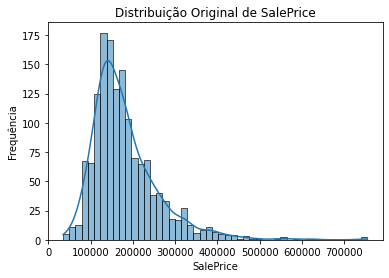

Skewness da variável SalePrice: 1.88
A variável SalePrice apresenta alta skewness positiva.


In [5]:
# Verificando a distribuição da variável alvo
sns.histplot(train["SalePrice"], kde=True)
plt.title("Distribuição Original de SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequência")
plt.show()

# Calculando skewness
saleprice_skewness = skew(train["SalePrice"])
print(f"Skewness da variável SalePrice: {saleprice_skewness:.2f}")

# Avaliando necessidade de transformação
if saleprice_skewness > 0.75:
    print("A variável SalePrice apresenta alta skewness positiva.")
else:
    print("A variável SalePrice não apresenta skewness significativa.")


<br><br>

# 4. Aplicando Transformação Logarítmica na Variável Alvo

**Objetivo**: Reduzir a skewness para melhorar a normalidade da variável alvo e com isso melhorar a eficiência e a estabilidade do modelo.

**Resultado**: Variável alvo transformada logaritmicamente.

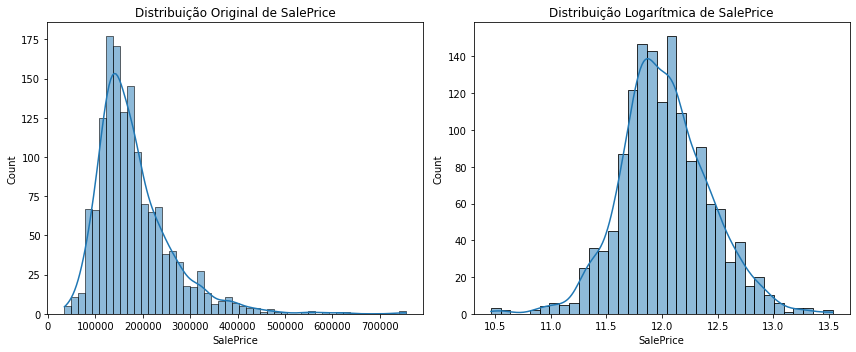

In [6]:
# Aplicando transformação logarítmica
y_train = np.log1p(train["SalePrice"])

# Comparando a distribuição antes e depois da transformação
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(train["SalePrice"], ax=axes[0], kde=True)
axes[0].set_title("Distribuição Original de SalePrice")
sns.histplot(y_train, ax=axes[1], kde=True)
axes[1].set_title("Distribuição Logarítmica de SalePrice")
plt.tight_layout()
plt.show()

<br><br>

# 5. Concatenando Recursos (Variáveis Independentes)

**Objetivo**: Garantir consistência na aplicação de transformações nos conjuntos de treino e teste.

**Resultado**: Dataset unificado para transformação.

In [7]:
train_features = train.drop(columns=["SalePrice"])
all_data = pd.concat([train_features, test], axis=0)
print(f"Dimensões após concatenação: {all_data.shape}")

Dimensões após concatenação: (2919, 80)


<br><br>

# 6. Lidando com Valores NA (variáveis do tipo numérico)

**Objetivo**: Substituir valores ausentes com a média de suas respectivas colunas.

#### Como será feito?

- Identificar as colunas com valores ausentes.
- Substituir os valores NA pela média de cada coluna.

**Resultado**: Dataset sem valores ausentes.

In [8]:
print(f"\nValores NA antes do preenchimento: {all_data.isnull().sum().sum()}")
all_data = all_data.fillna(all_data.mean())
print(f"Valores NA após o preenchimento: {all_data.isnull().sum().sum()}")


Valores NA antes do preenchimento: 13965
Valores NA após o preenchimento: 13287


<br><br>

# 7. Identificação e Correção de Skewness nos Recursos

**Objetivo**: Corrigir skewness em variáveis numéricas que podem impactar negativamente o modelo.

#### Como será feito?

- **Identificação das variáveis numéricas**: Filtra as colunas que são numéricas usando `all_data.dtypes`.
- **Cálculo da Skewness**: Aplica a função `skew` em cada variável para medir o grau de assimetria. Seleciona as variáveis com skewness maior que 0.75.
- **Visualização Antes e Depois**: 
  - Para cada variável identificada:
    - Plota a distribuição original (antes da transformação).
    - Aplica a transformação logarítmica np.log1p (log(x + 1)).
    - Plota a distribuição transformada (depois da transformação).

**Resultado**: Variáveis numéricas normalizadas.

Variáveis com alta skewness: ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


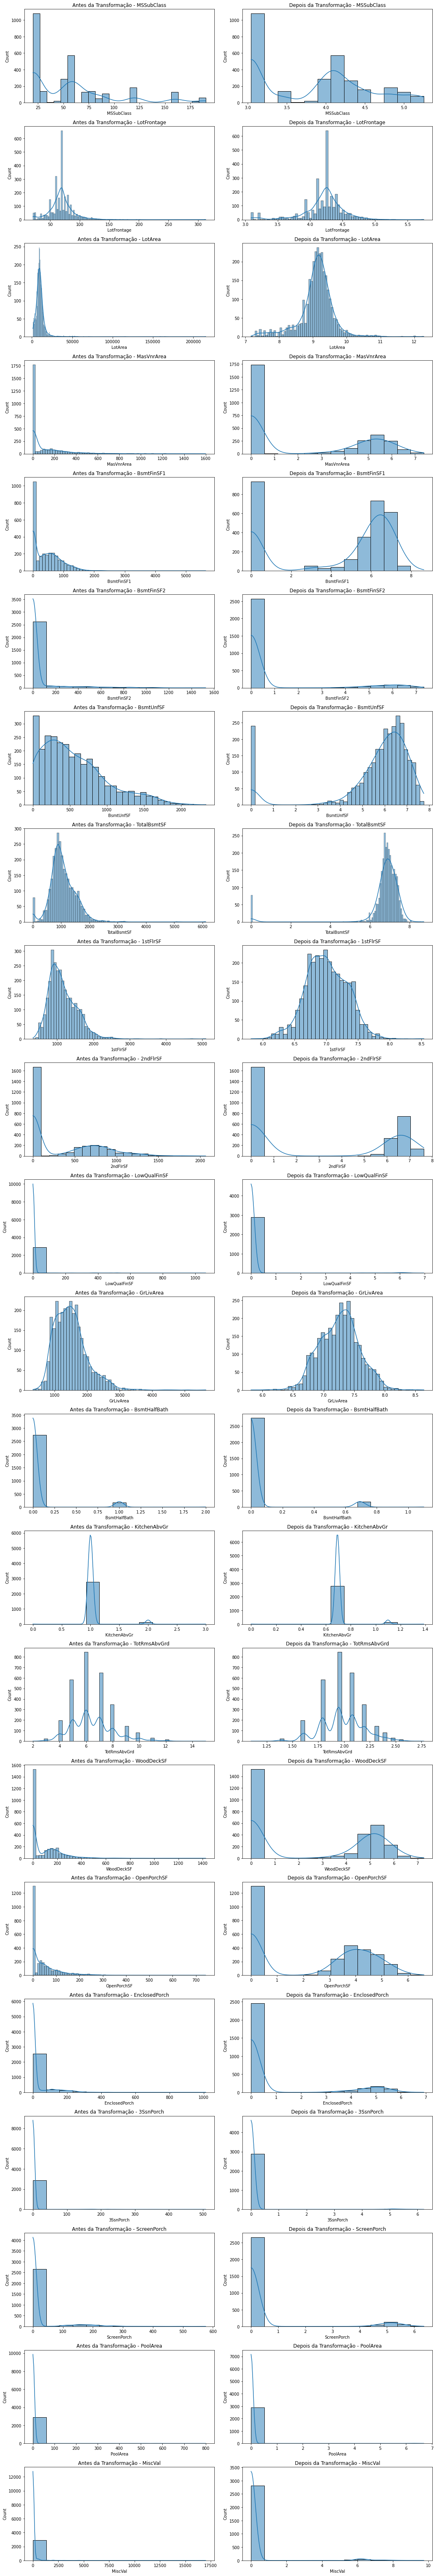

In [9]:
# Identificando variáveis numéricas
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Calculando skewness
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]

# Listando as variáveis com skewness alta
print(f"Variáveis com alta skewness: {list(skewed_feats.index)}")

# Visualizando as distribuições antes da transformação
fig, axes = plt.subplots(len(skewed_feats), 2, figsize=(15, len(skewed_feats) * 4))

for i, feature in enumerate(skewed_feats.index):
    # Antes da transformação
    sns.histplot(all_data[feature].dropna(), kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Antes da Transformação - {feature}")
    
    # Aplicando a transformação logarítmica
    all_data[feature] = np.log1p(all_data[feature])
    
    # Depois da transformação
    sns.histplot(all_data[feature].dropna(), kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Depois da Transformação - {feature}")

plt.tight_layout()
plt.show()

<br><br>

# 8. Tratamento de Variáveis Categóricas
**Objetivo**: Converter variáveis categóricas em representações numéricas (dummies).

#### Como será feito?
- Usar pd.get_dummies para codificação.

**Resultado**: Dataset preparado para modelagem.

In [10]:
print(f"\nDimensões antes da criação de dummies: {all_data.shape}")
print('\n\n')

all_data = pd.get_dummies(all_data)

print(f"Dimensões após criação de dummies: {all_data.shape}")


Dimensões antes da criação de dummies: (2919, 80)



Dimensões após criação de dummies: (2919, 289)


<br><br>

# 9. Separação dos Conjuntos de Treino e Teste
**Objetivo**: Dividir novamente os dados após transformações.

**Resultado**: Dados prontos para treinamento e teste.


In [11]:
# Realizando a divisão
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]

# Eliminando a Coluna Id
X_train = X_train.drop(columns=["Id"])
X_test = X_test.drop(columns=["Id"])

# Visualizando as dimensões e as primeiras linhas do conjunto de treino
print(f"\nTreino: {X_train.shape}, Teste: {X_test.shape}")


Treino: (1460, 288), Teste: (1459, 288)


<br><br>

# 10. Criação de Função de Avaliação (RMSE)
**Objetivo**: Avaliar a performance dos modelos usando validação cruzada.

**Resultado**: Função para cálculo de RMSE disponível.

In [12]:
def rmse_cv(modelo):
    rmse = np.sqrt(-cross_val_score(modelo, X_train, y_train, scoring="neg_mean_squared_error", cv=5))
    return rmse.mean()

print('\nFunção rmse_cv() criada com sucesso.\n')


Função rmse_cv() criada com sucesso.



<br><br>

# 11. Treinamento e Avaliação dos Modelos

<br>

### 11.1 Modelo de Regressão Linear
**Objetivo**: Avaliar o desempenho como base de comparação.

In [13]:
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)
rmse_linear = rmse_cv(modelo_lr)
print(f"RMSE - Regressão Linear: {rmse_linear:.5f}")

RMSE - Regressão Linear: 0.16497


<br>

### 11.2 Modelo de Regressão Ridge

**Objetivo**:
    
- Testar diferentes valores de regularização (α).
- Selecionar o melhor α com menor RMSE.

In [14]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
ridge_rmse = [rmse_cv(Ridge(alpha=alpha)) for alpha in alphas]
best_alpha_ridge = alphas[np.argmin(ridge_rmse)]
print(f"\nMelhor alpha para Ridge: {best_alpha_ridge}")
print(f"RMSE - Regressão Ridge: {min(ridge_rmse):.5f}")


Melhor alpha para Ridge: 10
RMSE - Regressão Ridge: 0.12716


<br>

### 11.1 Modelo de Regressão LASSO
**Objetivos**: 

- Ajustar um modelo LASSO com seleção automática de variáveis.
- Avaliar o desempenho do modelo usando **RMSE** e identificar quais variáveis foram efetivamente utilizadas pelo modelo.

<br>

#### Por que exibir os coeficientes no modelo LASSO?
O LASSO realiza regularização L1, que tem a capacidade de ajustar coeficientes de variáveis irrelevantes para exatamente **zero**. Isso permite identificar automaticamente quais variáveis são mais relevantes para o modelo e quais podem ser excluídas.

O gráfico dos coeficientes mostra as variáveis com maior impacto positivo ou negativo na predição. Ele nos ajuda a interpretar o modelo de forma visual, destacando as variáveis mais importantes para as previsões.

<br>

#### Por que não fazemos isso no Ridge?
No Ridge, a regularização L2 não reduz coeficientes a zero, mas apenas os encolhe em magnitude. Portanto, todas as variáveis permanecem no modelo, tornando a análise de exclusão de variáveis irrelevante.

<br>

#### Etapas do Código:

1. Criar o modelo LASSO com validação cruzada para encontrar o melhor parâmetro de regularização.
2. Calcular o RMSE do modelo para medir sua performance.
3. Identificar as variáveis usadas no modelo (coeficientes diferentes de zero) e as variáveis excluídas (coeficientes iguais a zero).
4. Gerar um gráfico mostrando os coeficientes mais relevantes (positivos e negativos).


RMSE - Regressão LASSO: 0.12270


Número de variáveis usadas no modelo: 108
Variáveis usadas no modelo:

Número de variáveis excluídas pelo modelo: 180
Variáveis excluídas:


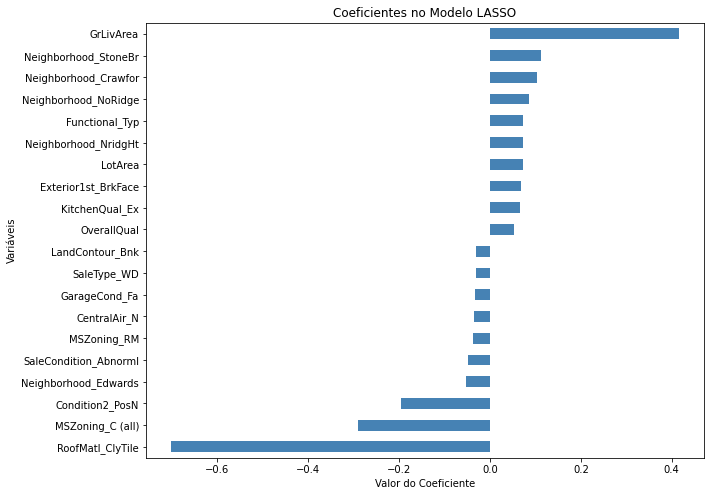

In [15]:
# Modelo de Regressão LASSO
modelo_lasso = LassoCV(alphas=[0.0005, 0.001, 0.005, 0.01], cv=5).fit(X_train, y_train)

# Calculando o RMSE
rmse_lasso = rmse_cv(modelo_lasso)
print(f"\nRMSE - Regressão LASSO: {rmse_lasso:.5f}\n\n")

# Coeficientes do modelo
coef_lasso = pd.Series(modelo_lasso.coef_, index=X_train.columns)

# Listando as variáveis utilizadas no modelo (coeficientes diferentes de zero)
variaveis_usadas = coef_lasso[coef_lasso != 0].index
print(f"Número de variáveis usadas no modelo: {len(variaveis_usadas)}")
print("Variáveis usadas no modelo:")
#print(list(variaveis_usadas))

# Listando as variáveis excluídas pelo modelo (coeficientes iguais a zero)
variaveis_excluidas = coef_lasso[coef_lasso == 0].index
print(f"\nNúmero de variáveis excluídas pelo modelo: {len(variaveis_excluidas)}")
print("Variáveis excluídas:")
#print(list(variaveis_excluidas))

# Gerando gráfico dos coeficientes mais relevantes
imp_coef_lasso = pd.concat([coef_lasso.sort_values().head(10), coef_lasso.sort_values().tail(10)])
plt.figure(figsize=(10, 8))
imp_coef_lasso.plot(kind="barh", color="steelblue")
plt.title("Coeficientes no Modelo LASSO")
plt.xlabel("Valor do Coeficiente")
plt.ylabel("Variáveis")
plt.show()


<br><br>

# 12. Construção do Modelo Final
**Objetivo**: Usar o modelo com melhor desempenho (menor RMSE).

In [16]:
y_pred = modelo_lasso.predict(X_test)
y_pred_final = np.expm1(y_pred)

print("\nPrevisões finais (SalePrice):")
print(y_pred_final[:10])


Previsões finais (SalePrice):
[119723.3865136  151595.62585571 181290.12639735 197795.77359033
 202596.07976441 170732.78324239 179959.1617666  159792.10183278
 196592.42589536 119207.33187865]


<br><br><br>

# Fim!